In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\rinde\Downloads\Instacart-Basket-Analysis-11-2023\Instacart Basket Analysis 11-2023'

In [3]:
# Import dataset
df_ords_prods_big = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_big.pkl'))

In [4]:
# Import product department index
department_index = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [5]:
# 2 Geogrpahic segmentation

In [6]:
# Define regions


In [7]:
# Define West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [8]:
df_ords_prods_big.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,First Name,Surnam,Gender,State,Age,dependants,family_status,income,_merge
0,33664,2 % Reduced Fat Milk,84,16,99999.0,183964,873,prior,3,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
1,33664,2 % Reduced Fat Milk,84,16,99999.0,1851256,873,prior,4,6,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
2,9020,Boneless Skinless Chicken Thighs,35,12,25.0,696790,873,prior,5,6,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
3,7877,Chicken Thighs,49,12,23.0,183964,873,prior,3,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
4,33464,Fresh Boneless Skinless Chicken Breasts,49,12,22.0,1744567,873,prior,2,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both


In [9]:
df_ords_prods_big.loc[df_ords_prods_big["State"].isin(west_states), 'region'] = 'West' # Assign region

In [10]:
#Midwest

In [11]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [12]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(mid_west_states), 'region'] = 'Midwest' # Assign region

In [13]:
# South

In [14]:
# Define South states
west_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [15]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(west_states), 'region'] = 'South' # Assign region

In [16]:
# Northeast#

In [17]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [18]:
df_ords_prods_big.loc[df_ords_prods_big['State'].isin(northeast_states), 'region'] = 'Northeast' # Assign region

In [19]:
# User count by region
df_ords_prods_big['region'].value_counts(dropna = False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [20]:
df_ords_prods_big.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'merge_indicator',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'Customer_frequency',
 'frequency_flag',
 'First Name',
 'Surnam',
 'Gender',
 'State',
 'Age',
 'dependants',
 'family_status',
 'income',
 '_merge',
 'region']

In [21]:
# Pivot spending_flag base on region
# spend_by_region = pd.crosstab(df_ords_prods_big['region'], df_ords_prods_big['spender_flag'], dropna = False).sort_values(by = 'HIgh_spender', ascending = False)

In [22]:
spend_by_region = pd.crosstab(df_ords_prods_big['region'], df_ords_prods_big['spender_flag'], dropna=False).sort_values(by = 'Low_spender', ascending = False)


In [23]:
spend_by_region

spender_flag,High_spender,Low_spender
region,,
South,60996,10740614
West,44376,8256069
Midwest,45951,7557859
Northeast,28785,5699562


In [24]:
df_ords_prods_big.columns.tolist()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'merge_indicator',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'Customer_frequency',
 'frequency_flag',
 'First Name',
 'Surnam',
 'Gender',
 'State',
 'Age',
 'dependants',
 'family_status',
 'income',
 '_merge',
 'region']

In [25]:
# Product count by Region
price_region = pd.crosstab(df_ords_prods_big['product_name'], df_ords_prods_big['region'], dropna=False,margins = True, margins_name = 'total').sort_values(by = 'total', ascending = False)


In [26]:
price_region

region,Midwest,Northeast,South,West,total
product_name,,,,,
total,7603810,5728347,10801610,8300445,32434212
Banana,110327,83345,158336,120557,472565
Bag of Organic Bananas,89270,66885,125585,97710,379450
Organic Strawberries,61611,46903,88379,67790,264683
Organic Baby Spinach,56220,42174,81399,62128,241921
...,...,...,...,...,...
Lowfat Cherry Lime Supernova Kefir Cultured Milk Smoothie,1,0,0,0,1
Peachtree Schnapps,0,0,1,0,1
Pappardelle Nests Pasta,1,0,0,0,1


In [27]:
# 3 Low Activity customers

In [28]:
# Define low_activity customers
df_ords_prods_big.loc[df_ords_prods_big['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers
df_ords_prods_big.loc[df_ords_prods_big['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [29]:
# User count base on activity level
df_ords_prods_big['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24436791
low_activity customers     7997421
Name: count, dtype: int64

In [30]:
# 4 Customer profiling

In [31]:
# Define low-income young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-income yound adult'

In [32]:
# Define low-income mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-income mid age'

In [33]:
# Define low-income senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] >= 25903) & (df_ords_prods_big['income'] <= 67124),

         'customer_profile'] = 'low-ncome senior'

In [34]:
# Define lower-middle-class young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 67124) & (df_ords_prods_big['income'] <= 96663),

         'customer_profile'] = 'lower-middle-class yound adult'

In [35]:
# Define lower-middle-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 67124 ) & (df_ords_prods_big['income'] <= 96663 ),

         'customer_profile'] = 'lower-middle-class mid age'

In [36]:
# Define lower-middle-class senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 67124 ) & (df_ords_prods_big['income'] <= 96663 ),

         'customer_profile'] = 'lower-middle-class senior'

In [37]:
# Define upper-middle-class yound adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class yound adult'

In [38]:
# Define upper-middle-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class mid age'

In [39]:
# Define upper-middle-class senior group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 96663 ) & (df_ords_prods_big['income'] <= 127961 ),

         'customer_profile'] = 'upper-middle-class senior'

In [40]:
# Define upper-class young adult group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] >= 18) & (df_ords_prods_big['Age'] <= 40)
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class young adult'

In [41]:
# Define upper-class mid age group
df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 40) & (df_ords_prods_big['Age'] <= 60)
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class mid age'

In [42]:
# Define upper-class senior age group

df_ords_prods_big.loc[(df_ords_prods_big['Age'] > 60) &  (df_ords_prods_big['Age'] <= 81  )
         & (df_ords_prods_big['income'] > 127961 ) & (df_ords_prods_big['income'] <= 593901 ),

         'customer_profile'] = 'upper-class senior'

In [43]:
# Familiy status count by customer profile
pro_fam = pd.crosstab(df_ords_prods_big['customer_profile'], df_ords_prods_big['family_status'], dropna = False)
pro_fam

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,14355,0,1021539,321814
low-income yound adult,0,697131,3348254,1357215
low-ncome senior,339712,0,1042866,0
lower-middle-class mid age,14302,0,986551,306079
lower-middle-class senior,360822,0,1061019,0
lower-middle-class yound adult,0,735644,3306209,1323094
upper-class mid age,46209,0,2910660,944193
upper-class senior,1012196,0,3051212,0
upper-class young adult,0,17951,85328,30129


In [44]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(df_ords_prods_big['customer_profile'], df_ords_prods_big['dependants'], dropna = False)
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
low-income mid age,336169,341704,327753,352082
low-income yound adult,1357215,1339435,1352872,1353078
low-ncome senior,339712,349712,351259,341895
lower-middle-class mid age,320381,337432,315267,333852
lower-middle-class senior,360822,342697,372558,345764
lower-middle-class yound adult,1323094,1354620,1339699,1347534
upper-class mid age,990402,980238,945976,984446
upper-class senior,1012196,992509,1039262,1019441
upper-class young adult,30129,33284,36253,33742


In [45]:
# 5 Distribution of Profiling

In [46]:
# Distribution of customer profile
df_ords_prods_big['customer_profile'].value_counts()

customer_profile
low-income yound adult            5402600
lower-middle-class yound adult    5364947
upper-class senior                4063408
upper-class mid age               3901062
upper-middle-class senior         3724446
upper-middle-class mid age        3595721
lower-middle-class senior         1421841
low-ncome senior                  1382578
low-income mid age                1357708
lower-middle-class mid age        1306932
upper-middle-class yound adult     779561
upper-class young adult            133408
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution Of Customer Profile')

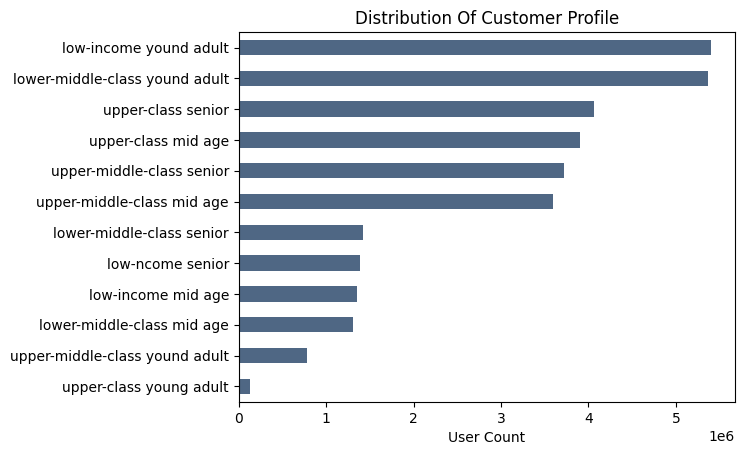

In [46]:
# Visualize the distribution of customer profile
df_ords_prods_big['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='#4f6784')
plt.ylabel('') # Eliminate y lable
plt.xlabel('User Count')
plt.title('Distribution Of Customer Profile') # Chart title

In [47]:
#6 Statics on Customer-profile for order frequency and expenditures

In [50]:
# Order frequency by customer profile
# freqt_customer_profile = df_ords_prods_big.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})
freqt_customer_profile = df_ords_prods_big.groupby('customer_profile').agg({'days_since_prior_order': ['mean']})
freqt_customer_profile_sorted = freqt_customer_profile.sort_values(by=('days_since_prior_order', 'mean'))
freqt_customer_profile_sorted

,days_since_prior_order
,mean
customer_profile,
upper-class young adult,10.356933
lower-middle-class senior,10.931313
upper-class senior,10.972695
lower-middle-class yound adult,10.996403
upper-middle-class mid age,11.024219
upper-middle-class senior,11.065481
lower-middle-class mid age,11.078025
upper-class mid age,11.101388


In [51]:
# 7 Customer Analysis by region

In [52]:
# Creat subset for the South region
south_customer = df_ords_prods_big[df_ords_prods_big['region']== 'South']

In [53]:
# User count for the South region
south_customer['user_id'].value_counts().sum()

10801610

In [54]:
# User count by customer profile
south_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    1820079
low-income yound adult            1817228
upper-class senior                1350169
upper-class mid age               1265882
upper-middle-class senior         1224998
upper-middle-class mid age        1157377
lower-middle-class senior          486259
low-ncome senior                   459817
low-income mid age                 452311
lower-middle-class mid age         451286
upper-middle-class yound adult     266244
upper-class young adult             49960
Name: count, dtype: int64

In [55]:
# Family status count
south_customer['family_status'].value_counts()

family_status
married                             7567385
single                              1782567
divorced/widowed                     921608
living with parents and siblings     530050
Name: count, dtype: int64

In [56]:
# Number of dependant count
south_customer['dependants'].value_counts()

dependants
2    2726248
3    2709010
0    2704175
1    2662177
Name: count, dtype: int64

In [57]:
# Total spending of the South customers
south_customer['prices'].sum()

108733754.60000013

In [58]:
# Customer spending statistics
south_customer['prices'].describe()

count    1.080007e+07
mean     1.006788e+01
std      4.762598e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [59]:
# Spending habbits outlook
south_customer['spender_flag'].value_counts(dropna= False)

spender_flag
Low_spender     10740614
High_spender       60996
Name: count, dtype: int64

In [60]:
# Top 10 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    158336
Bag of Organic Bananas    125585
Organic Strawberries       88379
Organic Baby Spinach       81399
Organic Hass Avocado       69833
Organic Avocado            59015
Large Lemon                50257
Strawberries               47818
Limes                      46613
Organic Whole Milk         46403
Name: count, dtype: int64

C:\Users\rinde\AppData\Local\Temp\ipykernel_11212\101182229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


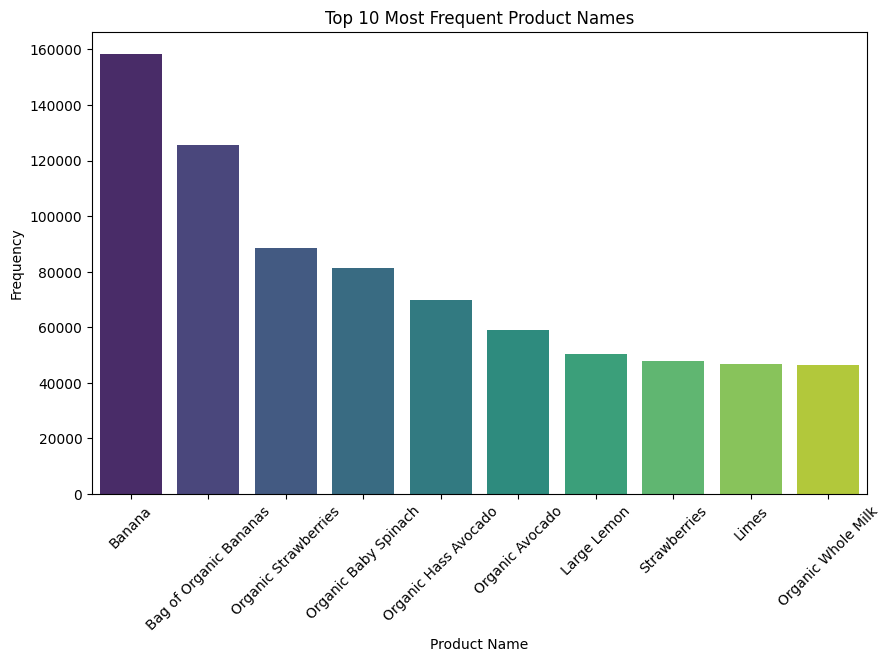

In [71]:
# Get the top 10 most frequent product names
top_products = south_customer['product_name'].value_counts(dropna=False).sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Most Frequent Product Names')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [72]:
# The most counts of order by departments
south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(10)

department_id
4     3160551
16    1801966
19     957346
7      898957
1      748463
13     622529
3      390294
15     356015
20     349419
9      287444
Name: count, dtype: int64

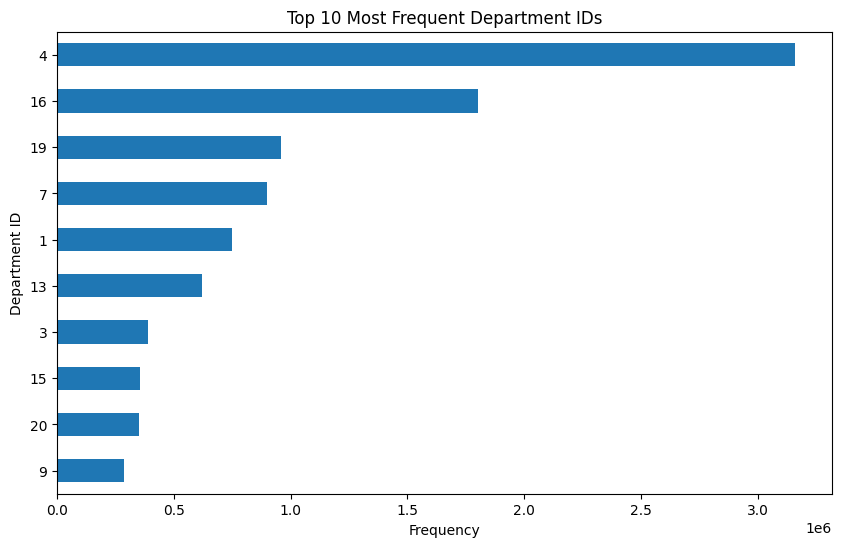

In [86]:
# Get the top 10 most frequent department_id values
top_departments = south_customer['department_id'].value_counts(dropna=False).sort_values(ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
top_departments.plot(kind='barh')
plt.title('Top 10 Most Frequent Department IDs')
plt.xlabel('Frequency')
plt.ylabel('Department ID')
plt.gca().invert_yaxis()  # Optional: Invert y-axis to have the highest values on top
plt.show()


In [62]:
# 8 Visulization


Text(0.5, 1.0, 'Histogram - Orders By Day of Week')

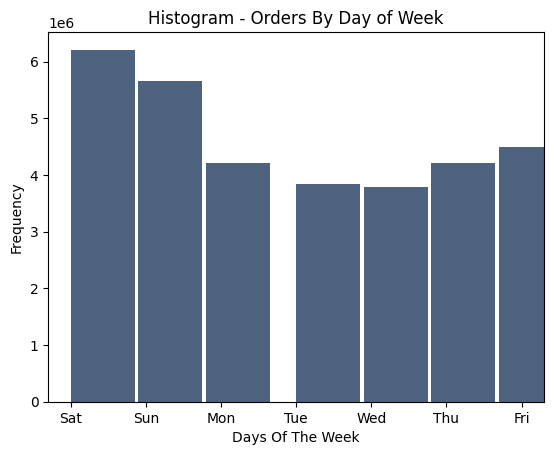

In [63]:
# Viz of the busiest day of week for order
busiest_dow = df_ords_prods_big['order_dow'].plot.hist(width = 0.85,bins = 20, color = '#4c627f')
plt.xlabel('Days Of The Week')  # Label for the x-axis
plt.xticks(range(7), ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
plt.title('Histogram - Orders By Day of Week') # Chart title

Text(0.5, 1.0, 'Histogram of Order Time of Day')

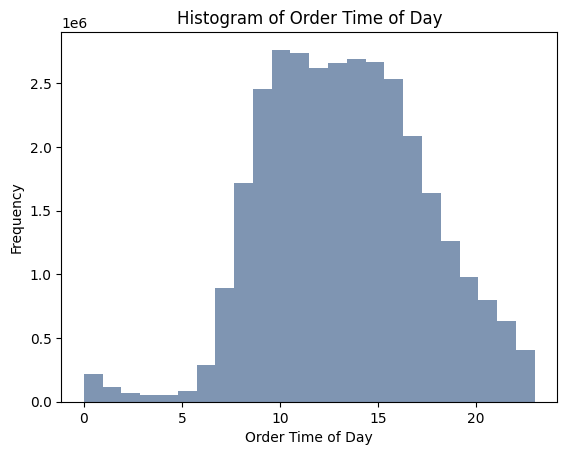

In [64]:
# Viz of the busiest hour of day for order
busiest_hod = df_ords_prods_big['order_hour_of_day'].plot.hist(bins = 24, color = '#7f95b2')

plt.xlabel('Order Time of Day')  # Label for the x-axis

plt.title('Histogram of Order Time of Day')  # Title of the bar chart

In [65]:
# Create Sample data
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_big)) <= 0.7

# Store 70% of the sample in the data frame big
big = df_ords_prods_big[dev]
# Store 30% of the sample in the data frame small
small = df_ords_prods_big[~dev]

Text(0.5, 1.0, 'Trend of Product Price with Order Time')

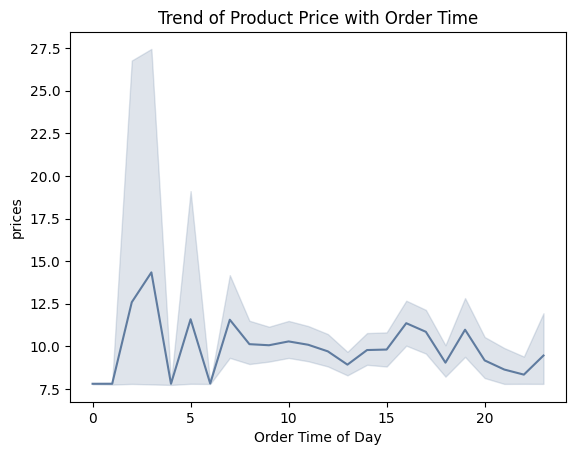

In [69]:
# Create line chart with random small sample data of the dataset to discover the insight of the price of goods and the order time of the day

tod_price = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Trend of Product Price with Order Time')  # Title of the bar chart

In [67]:
# Save figure
tod_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tod_price.png'))

Text(0.5, 1.0, 'Trend of Product Price with Order Day')

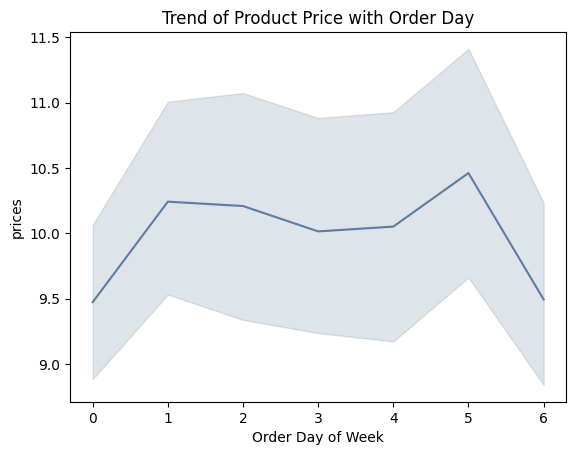

In [68]:
# Create line chart with random small sample data of the dataset

dow_price = sns.lineplot(data = small, x = 'order_dow',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Trend of Product Price with Order Day')  # Title of the bar chart

In [70]:
# Save figure
dow_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_price.png'))